<div style="background: #D5CFF9; padding: 10px; border: 0.5px #B0E0E6; border-radius: 10px;"> 
    
**Название проекта**
    
Исследование объявлений о продаже квартир
    
_____
    
    
**Описание исследования**
    
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
    
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 
    
_____
    
    
**Цель исследования**
    
Установление параметров для определения рыночной стоимости объектов недвижимости
    
_____
**Исходные данные**
    
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

______
    

**Данное исследование разделим на несколько частей.**

**[Часть 1. Изучение общей информации:](#part1)**
* [1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.](#part1.1)
* [2. Построение "ящиков с усами" и гистограмм по столбцам с числовыми данными.](#part1.2)

**[Часть 2. Подготовка данных:](#part2)**
* [1. Обработка пропусков.](#part2.1)
* [2. Изменение типов данных.](#part2.2)
* [3. Удаление дубликатов.](#part2.3)
* [4. Удаление аномалий.](#part2.4)
* [5. Добавление новых столбцов.](#part2.5)
    
**[Часть 3. EDA:](#part3)**
* [1. Изучение параметров объектов (общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления). Построение диаграмм для каждого параметра и написание наблюдений по ним.](#part3.1)
* [2. Выяснить, как быстро продавались квартиры.](#part3.2)
* [3. Выявление зависимости между ценой и общей, жилой площадью, площадью кухни, количеством комнат, этажём, на котором расположена квартира, датой размещения. Построение графиков, которые покажут зависимость цены от указанных параметров.](#part3.3)
* [4. Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.](#part3.4)
* [5. Расчёт средней стоимости километра до центра Санкт-Петербурга.](#part3.5)
    
**[Часть 4. Написание общего вывода](#part4)**
    
    
_________________
    
    
</div>

<a id='part1'></a>
## Часть 1. Изучение общей информации

<a id='part1.1'></a>
### 1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style="darkgrid")

In [128]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

display(df.head(10))
print()
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

<a id='part1.2'></a>
### 2. Построение "ящиков с усами" и гистограмм по столбцам с числовыми данными.

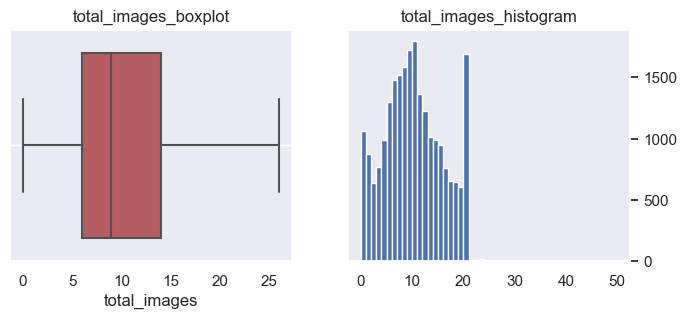

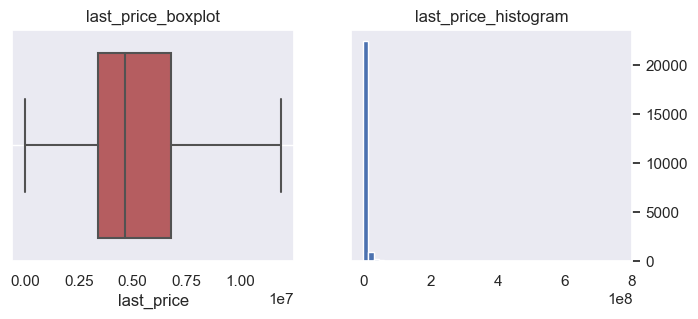

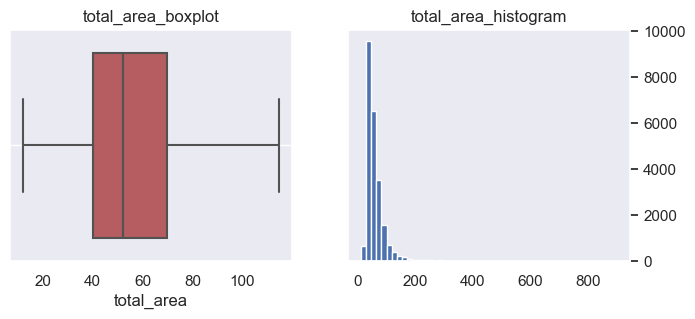

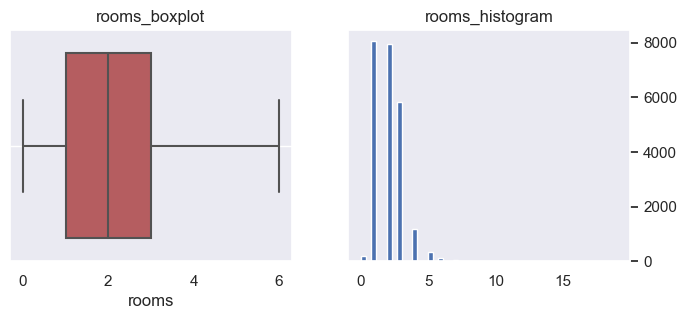

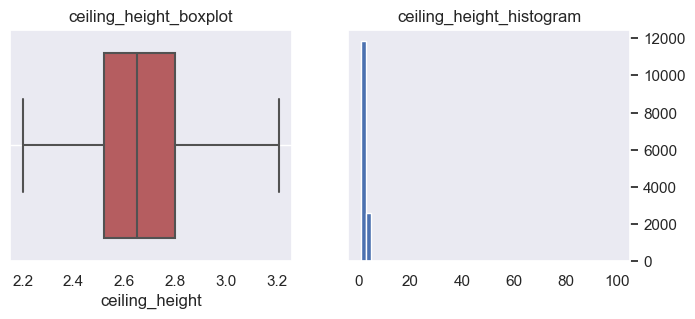

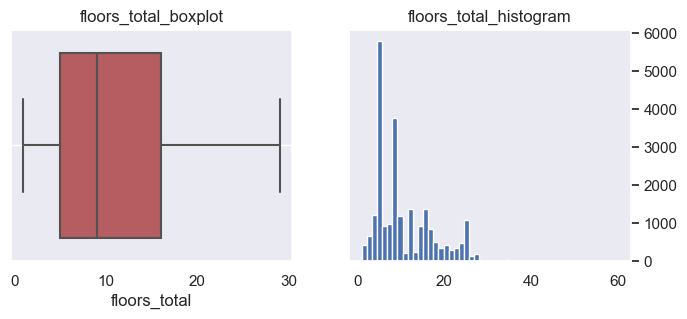

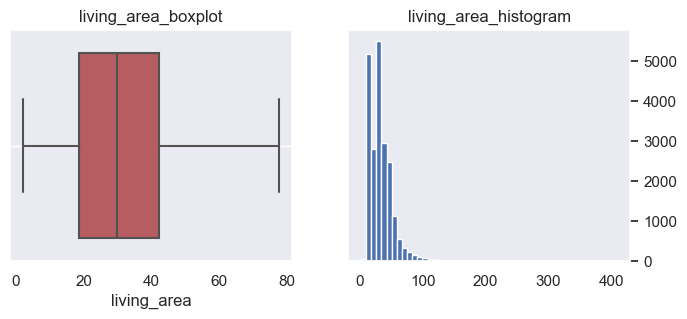

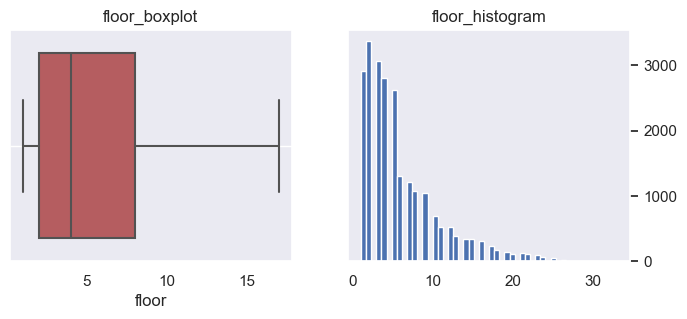

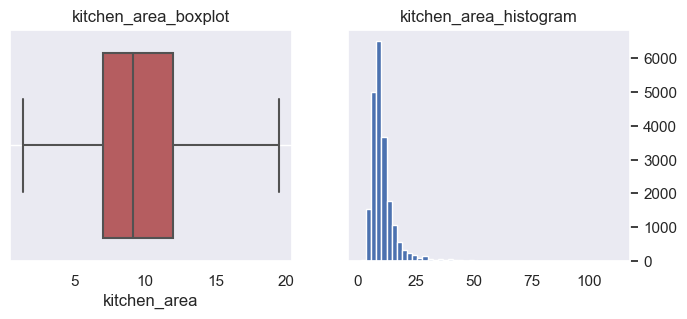

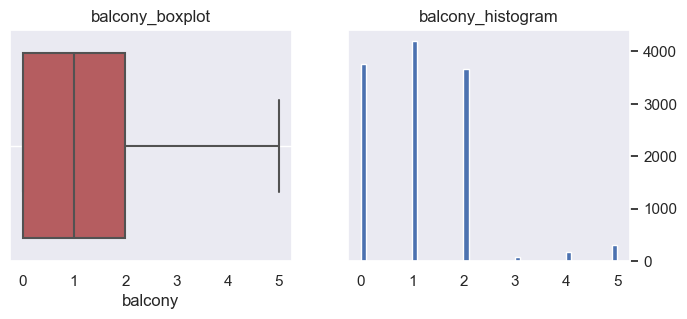

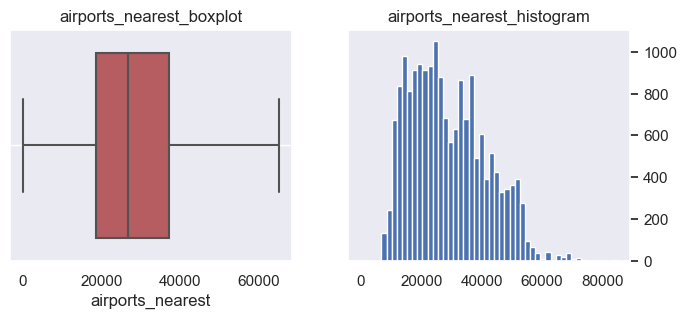

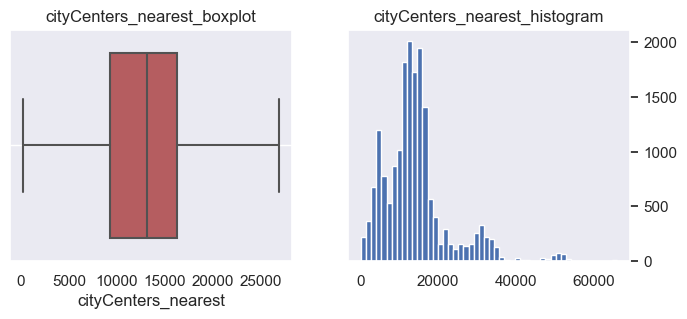

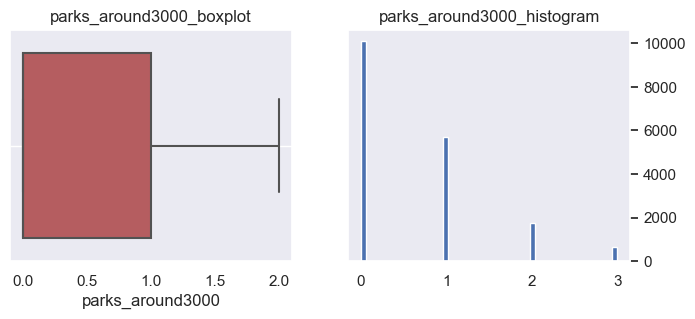

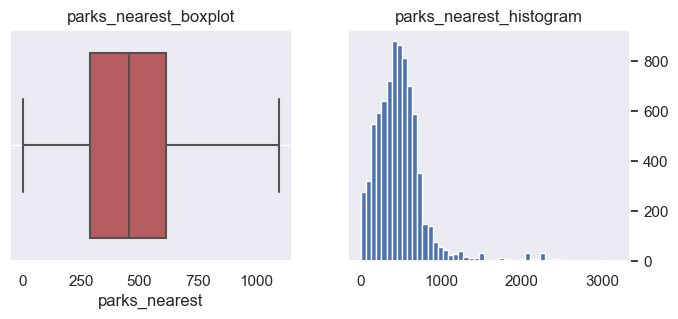

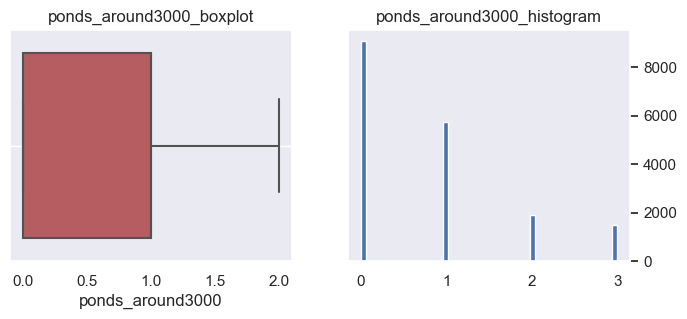

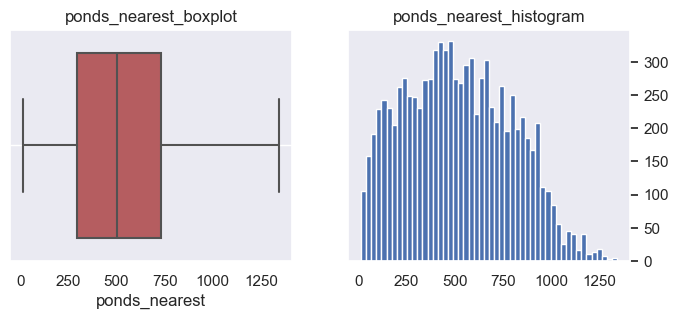

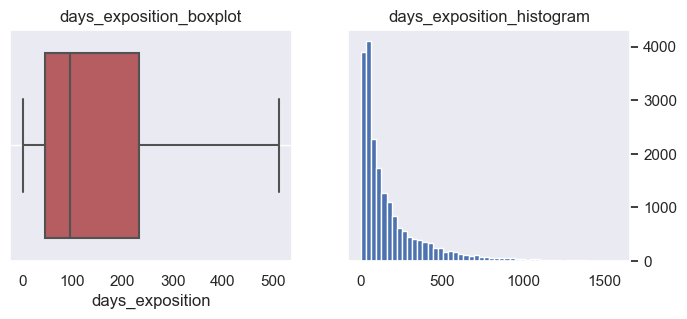

In [129]:
# так как гистограммы не всегда информативны, добавим к ним ящик с усами для каждого столбца

for i in df.select_dtypes(['int', 'float']).columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    sns.boxplot(data=df, x=i, orient='h', color='r', showfliers=False, ax=ax1)
    ax1.set_title(i + '_boxplot')
    ax1.grid()
    ax1.set_axisbelow(True)
    
    ax2.hist(df[i], bins=50)
    ax2.set_title(i + '_histogram')
    ax2.grid()
    ax2.yaxis.tick_right()
    ax2.set_axisbelow(True)
    
    plt.show()

**Вывод:**
1. Столбцы last_price, floors_total, days_exposition должны иметь скорее тип данных int. Даты в столбце first_day_exposition имеет смысл избавить от времени, т.к. время там округлено. Значения NaN в столбце balcony следует заменить на 0 и привести к int.
2. Распределение данных в столбце total_images кажется нормальным за исключением резкого скачка на уровне 20 фотографий. Предположу, что Яндекс.Недвижимость предлагает дополнительное продвижение объявлений, по которым загружено минимум 20 фото или что-то аналогичное.
3. Медиана на boxplot столбца last_price смещена слево, следовательно, б*о*льшая доля недвижимости стоит до 5 млн.руб.
4. Распределение в столбце total_area похоже на распределение Пуассона и кажется подходящим: нет недвижимости, площадь которой составляет 0 квадратных метров или около того, далее с определённого числа метраж недвижимости увеличивается до самого частого и постепенно опускается до минимальной частоты.
5. В распределении по столбцу rooms есть небольшое кол-во комнат, равных 0. Предположу, что таким образом отображаются студии. В остальном график вполне отражает реальность.
6. Судя по данным из столбца ceiling_height, большинство недвижимости имеет высоту потолков приблизительно от 2 до 3 метров.
7. В большинстве зданий, где продаётся недвижимость, меньше 10 этажей. Больше всего пятиэтажных и девятиэтажных зданий.
8. Большинсво значений столбца living_area расположены в области до 50 кв.м.
9. Недвижимость продаётся в основном ниже, чем на пятом этаже. Это сходится с информацией, полученной по floors_total, где выяснилось, что больше всего недвижимости продаётся в пятиэтажках.
10. Балконов приблизительно в равной степени от 0 до 2.
11. Недвижимость не продаётся в аэропортах, а приблизительно в 7-8 км от него, что вполне логично. Продающейся недвижимости непосредствено в центре города мало, что также логично: в центре меньше площади для застройки, а также меньше жилой недвижимости для продажи. Парков в ближайшей доступности (3 км) мало - их либо нет, либо в большинстве своём только один, но если он и есть, то меньше чем в километре. Boxplot и гистограммы по ближайшим паркам и водоёмам схожи - предположу, что в ближайшем парке как раз и находится водоём.
12. В большинстве случаев недвижимость продаётся быстрее, чем за 100 дней.

<a id='part2'></a>
## Шаг 2. Подготовка данных

<a id='part2.1'></a>
### 1. Обработка пропусков.

In [130]:
# выведем кол-во пропущенных значений по столбцам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [131]:
# есть гипотеза, что большинство пятиэтажек - "хрущёвки". Высота потолков
# в "хрущёвках" равна 2.5 метрам. Заменим пустые значения потолков в "хрущёвках"
# на медианное значение по высоте потолков в "хрущёвках"

df.loc[(df['floors_total'] == 5.0) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
df.loc[df['floors_total'] == 5.0, 'ceiling_height'].median()

# остальные значения заменим медианным без учёта df['floors_total'] = 5
df.loc[~(df['floors_total'] == 5.0) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
df.loc[~(df['floors_total'] == 5.0), 'ceiling_height'].median()

In [132]:
# пустых значений в floors_total пренебрежительно мало, заменим медианным
df.loc[df['floors_total'].isna(), 'floors_total'] = \
       df.query('floors_total.isna()')['floors_total'].fillna(df['floors_total'].median())

In [133]:
# узнаем, какую долю составляет living_area от total_area, от полученных
# значений посчитаем медиану. Пустые значения в living_area заменим 
# полученной медианой, умноженной на total_area

df.loc[df['living_area'].isna(), 'living_area'] = \
(df['total_area'] * (df['living_area'] / df['total_area']).median()).round(1)

In [134]:
# аналогичным образом заполним пустые значения в столбце kitchen_area, однако
# теперь посчитаем долю метража кухни от жилой площади

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = \
(df['living_area'] * (df['kitchen_area'] / df['living_area']).median()).round(1)

In [135]:
# отсутствующие значения в столбце balcony будем считать за отсутствие балкона,
# следовательно, заменим пустые значения нулём

df['balcony'] = df['balcony'].fillna(0)

In [136]:
# пропусков в столбце locality_name пренебрежительно мало, избавимся от них

df = df.dropna(subset=['locality_name'])

In [137]:
# проверим, всё ли заменилось

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Вывод:**
1. В столбце is_apartment почти 21к из 23к пропущенных значений. Можно предположить, что все незаполненные ячейки означают, что недвижимость не является апартаментами, однако, если это не так, будет искажена б*о*льшая доля данных, поэтому заменять пустые значения в данном столбце не будем. Кроме того, значения могут быть пропущены, потому что пользователь не знает точно, что относится к апартаментам.
2. Данные о дальности, полученные автоматически (аэропорт, парк, водоём), заменять медианным значением не будет, так как, предположу, что данные пропущены, т.к. не попадают в указанный радиус. Следовательно, было бы неправильно заменять пустые значения медианными, если аэропорта или парка рядом нет.
3. Что касается столбца days_exposition, известно следующее: в столбце нет ни одного нулевого значения. Объяснений этому напрашивается 2: объявление снимали в тот же день, что и выкладывали (по техническим причинам или по желанию пользователя), либо недвижимость покупали в тот же день, что и выкладывалось объявление, что маловероятно. В любом случае, предпочту пустые значения не трогать.
4. Что насчёт остальных столбцов, где пропущенные значения были заменены, попробую предположить причину пропусков:
 - *ceiling_height*: пользователь не знает высоты своих потолков;
 - *floors_total*: техническая ошибка, либо пользователь не знает общее кол-во этажей в своём доме (как, например, и я);
 - *living_area*: снова проблема со стороны пользователя, т.к. не у всех есть подробная информация о метраже недвижимости, помимо общей площади. Это также касается площади кухни.
 - *balcony*: при заполнении этого поля пользователь предполагает, что пустое поле означает отсутствие балкона, то бишь 0.
 - *locality_name*: возможно, среди выпадающих вариантов местности не было нужного пользователю, поэтому он ввёл местоположение недвижимости в неподходящем формате, что воспринялось системой как ошибка/отсутвтие данных.

<a id='part2.2'></a>
### 2. Изменение типов данных.

In [138]:
# как и было сказано в части изучения общей информации, заменим тип данных
# в столбцах last_price, floors_total, balcony с float на int. Провести тоже самое
# с days_exposition не получится, т.к. столбец содержит NaN

data_type_to_change = ['last_price', 'floors_total', 'balcony']
for col in data_type_to_change:
    df[col] = df[col].astype('int64')

# приведём даты в столбце first_day_exposition к подходящему виду
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

# столбец is_apartment содержит True/False значения. Приведём его к типу данных bool
df['is_apartment'] = df['is_apartment'].astype('bool')

**Вывод:**

1. Столбцы last_price, floors_total и balcony имеют целые значения, следовательно, тип данных float им ни к чему.
2. Столбец first_day_exposition имел лишнюю часть со временем, которое, по видимому, было округлено. Раз оно больше ни к чему, избавились от него и привели столбец к типу данных datetime.
3. Столбец is_apartment содержит bool значения, хотя имеет тип данных object, поэтому поменяли на bool.
4. Столбцы days_exposition, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest тоже следовало бы привести к типу данных int по логике первого пункта, однако все они содержат NaN, поэтому привести к int их не получится.

<a id='part2.3'></a>
### 3. Удаление дубликатов.

In [139]:
# проверим столбец locality_name на наличные неявных дубликатов
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [140]:
# большинство неявных дубликатов формируются за счёт буквы е/ё
# в слове "посёлок" и приставок в духе "коттеджный", "городского типа",
# "станции" и т.д. Создадим функции, которая заменяет "ё" на "е" и 
# убирает лишние слова из названия населённого пункта

def yo_replacement(text):
    if 'ё' in text:
        return text.replace('ё', 'е')
    else:
        return text
    
def unnecessary_words_replacement(text):
    
    words_to_replace = ['городской ', 'коттеджный ', ' городского типа', ' при железнодорожной станции', ' станции']
    
    for i in words_to_replace:
        if i in text:
            return text.replace(i, '')
        
    return text

In [141]:
# произведём замену
df['locality_name'] = df['locality_name'].apply(yo_replacement)
df['locality_name'] = df['locality_name'].apply(unnecessary_words_replacement)

<a id='part2.4'></a>
### 4. Удаление аномалий.

In [142]:
# вся недвижимость, высота потолков у которой 8 метров и больше,
# поделим на 10, так как сложно представить себе квартиру с 
# десятиметровыми потолками

df.loc[df['ceiling_height'] >= 8, 'ceiling_height'] = \
df.loc[df['ceiling_height'] >= 8, 'ceiling_height'].apply(lambda x: round((x / 10), 2))

# предположим, что сараи или погребы в сервисе не продаются.
# Тогда исключим все объявления, где высота потолков меньше 1.75

df = df.query('ceiling_height >= 1.75')

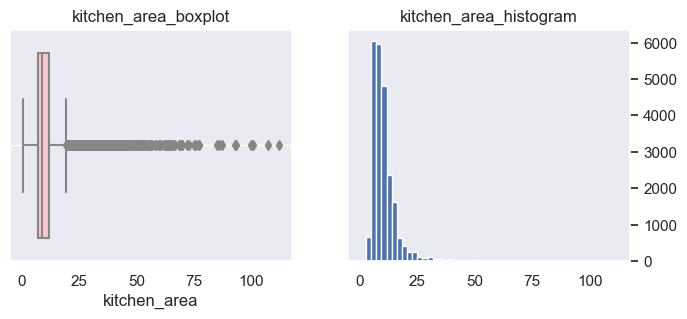

In [143]:
# взглянем на выбросы и распределение по столбцу kitchen_area
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sns.boxplot(data=df, x='kitchen_area', orient='h', color='pink', ax=ax1)
ax1.set_title('kitchen_area_boxplot')
ax1.grid()
ax1.set_axisbelow(True)

ax2.hist(df['kitchen_area'], bins=50)
ax2.set_title('kitchen_area_histogram')
ax2.grid()
ax2.yaxis.tick_right()
ax2.set_axisbelow(True)

In [144]:
# будем считать кухни с площадью больше 30 и меньше 2 метров аномалиями
df = df.query('1.9 < kitchen_area <= 30')

In [145]:
# также будем считать кол-во комнат до 1 и больше 8 аномалиями
df = df.query('rooms >= 1 and rooms <= 8')

# уберём объявления, где до ближайшего аэропорта 0 метров
df = df.query('airports_nearest != 0')

# уберём, объявления, где время реализации составило до 3 дней
df = df.query('days_exposition >= 3')

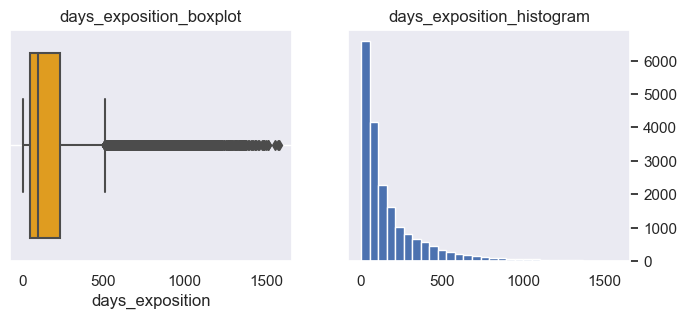

In [146]:
# взглянем на выбросы и распределение по столбцу days_exposition
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sns.boxplot(data=df, x='days_exposition', orient='h', color='orange', ax=ax1)
ax1.set_title('days_exposition_boxplot')
ax1.grid()
ax1.set_axisbelow(True)

ax2.hist(df['days_exposition'], bins=30)
ax2.set_title('days_exposition_histogram')
ax2.grid()
ax2.yaxis.tick_right()
ax2.set_axisbelow(True)

In [147]:
# будем считать кол-во дней экспозиции свыше 750 аномалиями
df = df.query('days_exposition <= 750')

In [148]:
# посмотрим, какую долю данных пришлось срезать вместе с аномалиями
df_old = pd.read_csv('real_estate_data.csv', sep='\t')

print('Доля удалённых данных:', f'{(((1 - df.shape[0] / df_old.shape[0])) * 100):.2f}%')

Доля удалённых данных: 18.49%


<a id='part2.5'></a>
### 5. Добавление новых столбцов.

In [149]:
# добавим столбец со стоимостью одного квадратного метра
df['m2_price'] = round((df['last_price'] / df['living_area']), 2)

# добавим столбцы с днём недели, месяцем и годом размещения объявления
df['exposition_dow'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

# создадим функцию для создания столбца с типом этажа
def set_floor_type(floor):
    for i in df['floors_total']:
        if floor == i:
            return 'последний'
        elif floor == 1:
            return 'первый'
        else:
            return 'другой'
        
# создадим столбец, содержащий тип этажа
df['floor_type'] = df['floor'].apply(set_floor_type)

# создадим столбец с кол-вом км от недвижимости до центра города
df['kms_to_center'] = df['cityCenters_nearest'].apply(lambda x: x // 1000)

<a id='part3'></a>
## Часть 3. EDA

<a id='part3.1'></a>
### 1. Изучение параметров объектов (общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления). Построение диаграмм для каждого параметра и написание наблюдений по ним.

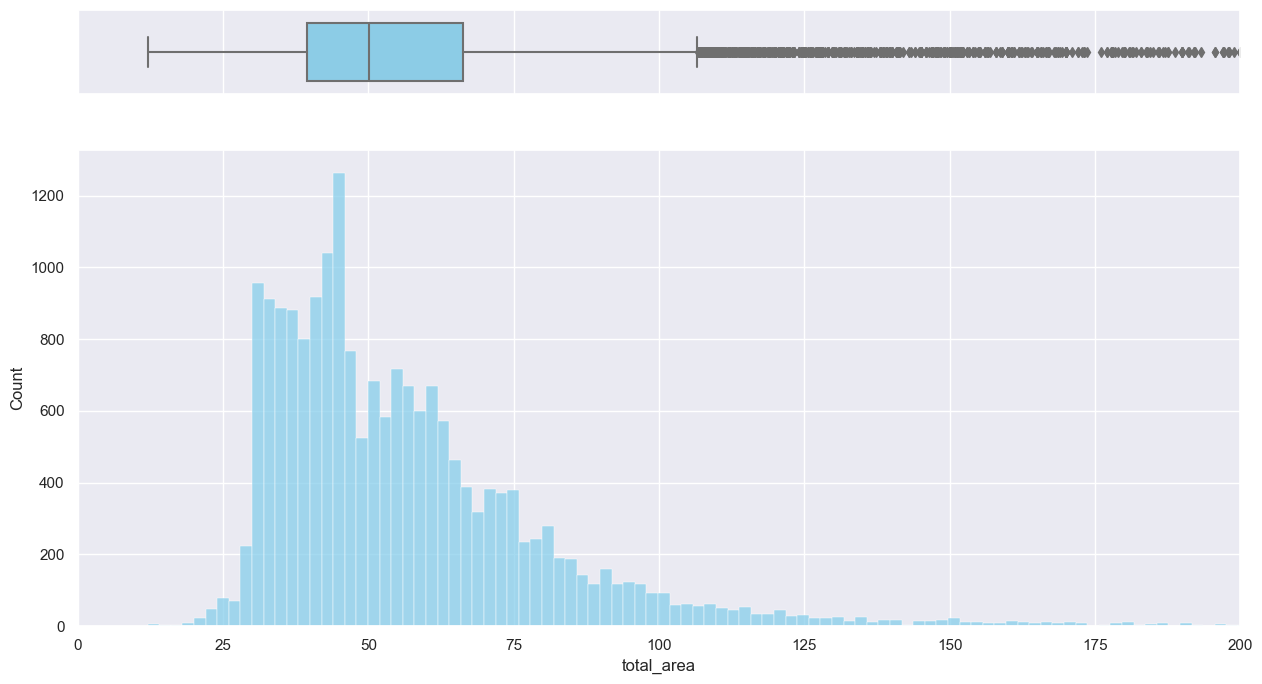

In [150]:
# построим гистограмму и boxplot для столбца total_area

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='total_area', color='skyblue', width=0.7, saturation=0.9, ax=ax1)
sns.histplot(data=df, x='total_area', color='skyblue', ax=ax2)

plt.xlim(0, 200)
ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу total_area:**
распределение имеет две вершины, поэтому не является нормальным. Больше похоже на распределение Пуассона: нулевые значения отсутствуют, т.к. нет недвижимости с площадью меньше 10 кв.м., далее относительно резкое увеличение до самой популярной площади недвижимости (около 50 кв.м.), потом спуск - меньше недвижимости с б*о*льшей площадью. Что, в целом, соответствует реальности.

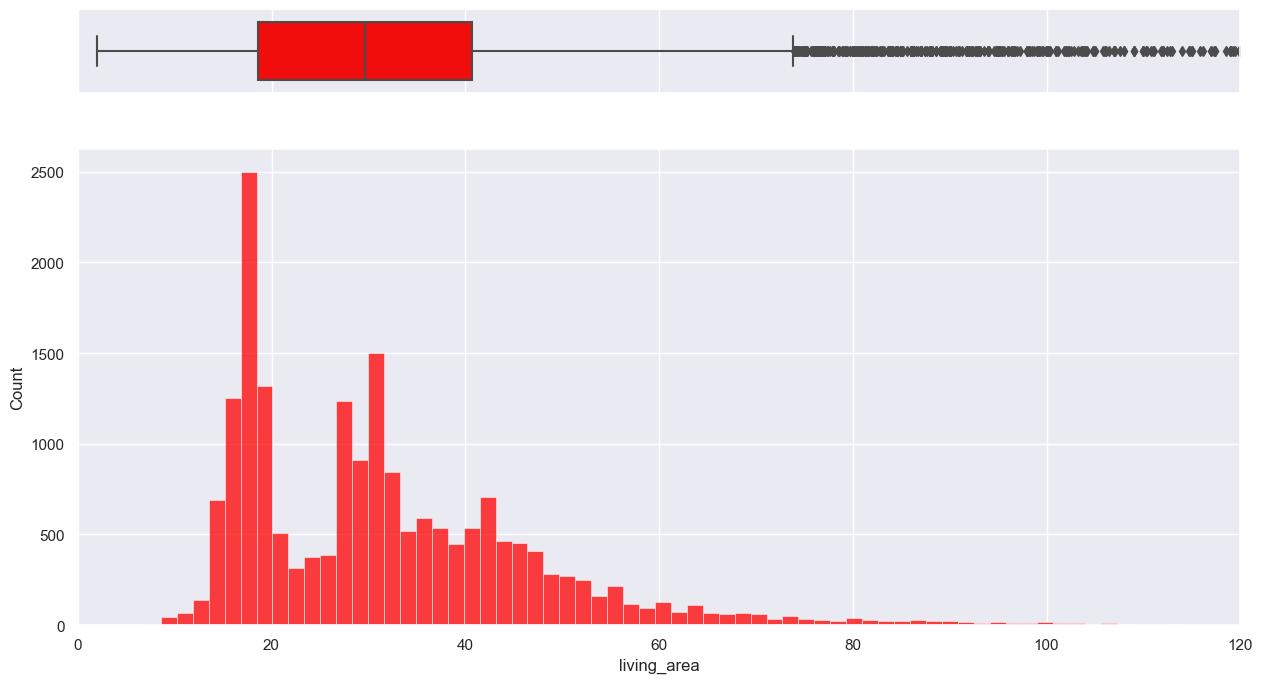

In [151]:
# построим гистограмму и boxplot для столбца living_area

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='living_area', color='red', width=0.7, saturation=0.9, ax=ax1)
sns.histplot(data=df, x='living_area', color='red', ax=ax2)

plt.xlim(0, 120)
ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу living_area:** на гистограмме две вершины. Можно сказать, что самая продавая недвижимость - студии или однокомнатные квартиры площадью 16-18 кв.м. Далее происходит спуск, предположим, из-за того, что строится не так много квартир площадью 20-25 кв.м., следовательно, и продают их меньше. Далее появляются однокомнатные квартиры с более популярной площадью - 32-37 кв.м., чем и объясняется появление второй вершины.

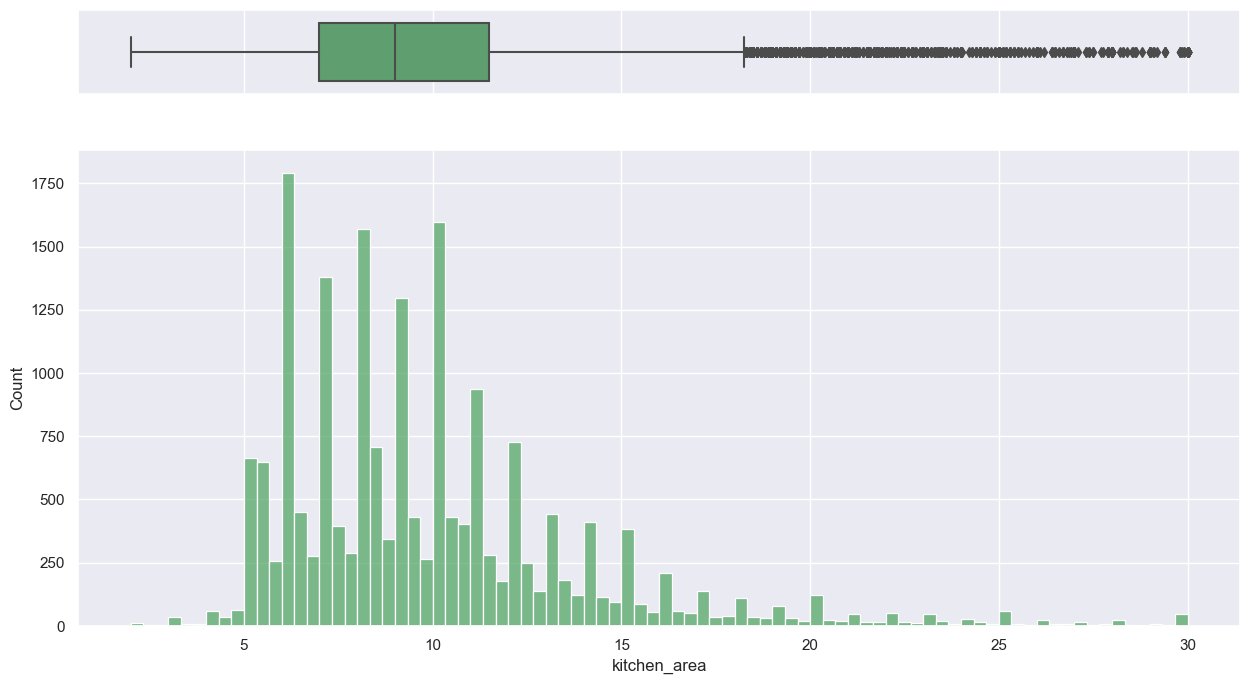

In [152]:
# построим гистограмму и boxplot для столбца kitchen_area

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='kitchen_area', color='g', width=0.7, ax=ax1)
sns.histplot(data=df, x='kitchen_area', color='g', ax=ax2)


ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу kitchen_area:** резкие скачки между столбиками можно объяснить популярностью определённых планировок. Например, среди строительных компаний распространены планировки, где площадь кухни чаще всего составляет 9, 11, 13 и т.д. кв.м., и менее популярные ЖК, где площадь кухни составляет 8, 10, 12 и т.д. кв.м.

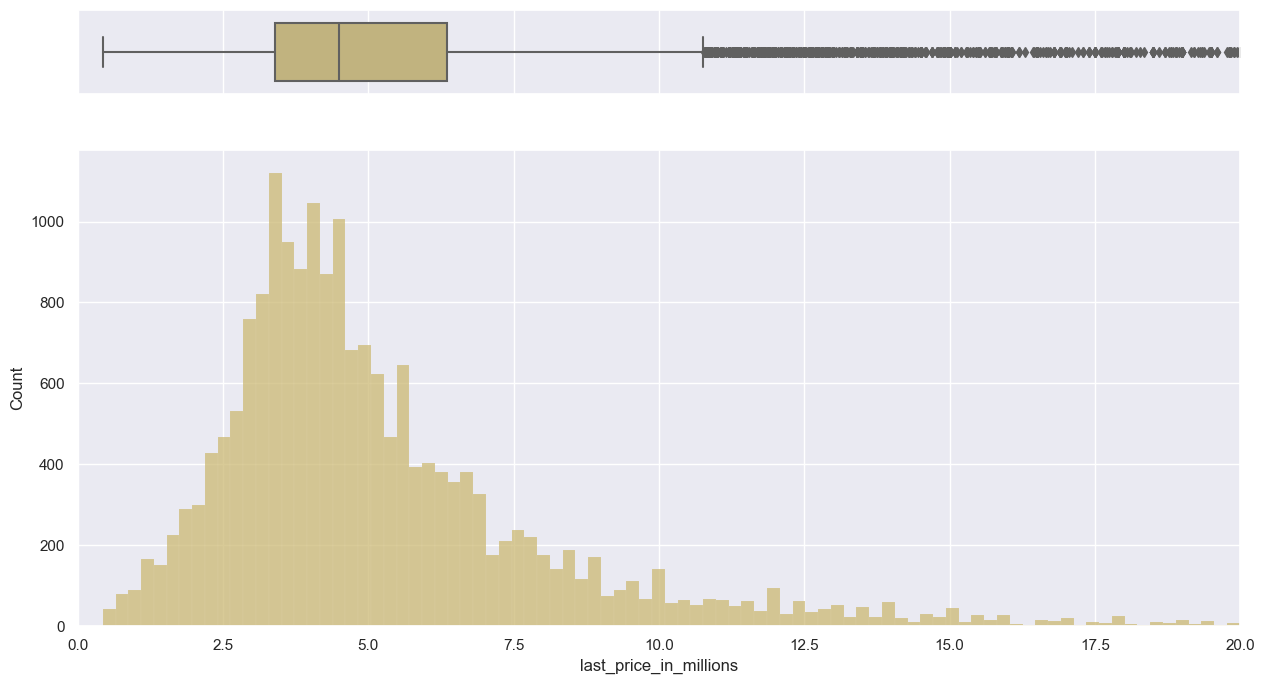

In [153]:
# построим гистограмму и boxplot для столбца last_price

df['last_price_in_millions'] = round((df['last_price'] / 1000000), 2)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='last_price_in_millions', color='y', width=0.7, ax=ax1)
sns.histplot(data=df, x='last_price_in_millions', color='y', ax=ax2)

plt.xlim(0, 20)
ax1.set(xlabel='')
ax2.set(xlabel='last_price_in_millions')
plt.show()

In [154]:
df['last_price_in_millions'].describe()

count    19316.000000
mean         5.774675
std          6.776929
min          0.430000
25%          3.400000
50%          4.500000
75%          6.350000
max        401.300000
Name: last_price_in_millions, dtype: float64

**Комментарий по столбцу last_price:** медиана скошена влево, следовательно, больше продаётся недвижимости стоимостью до 4.6 млн.руб.

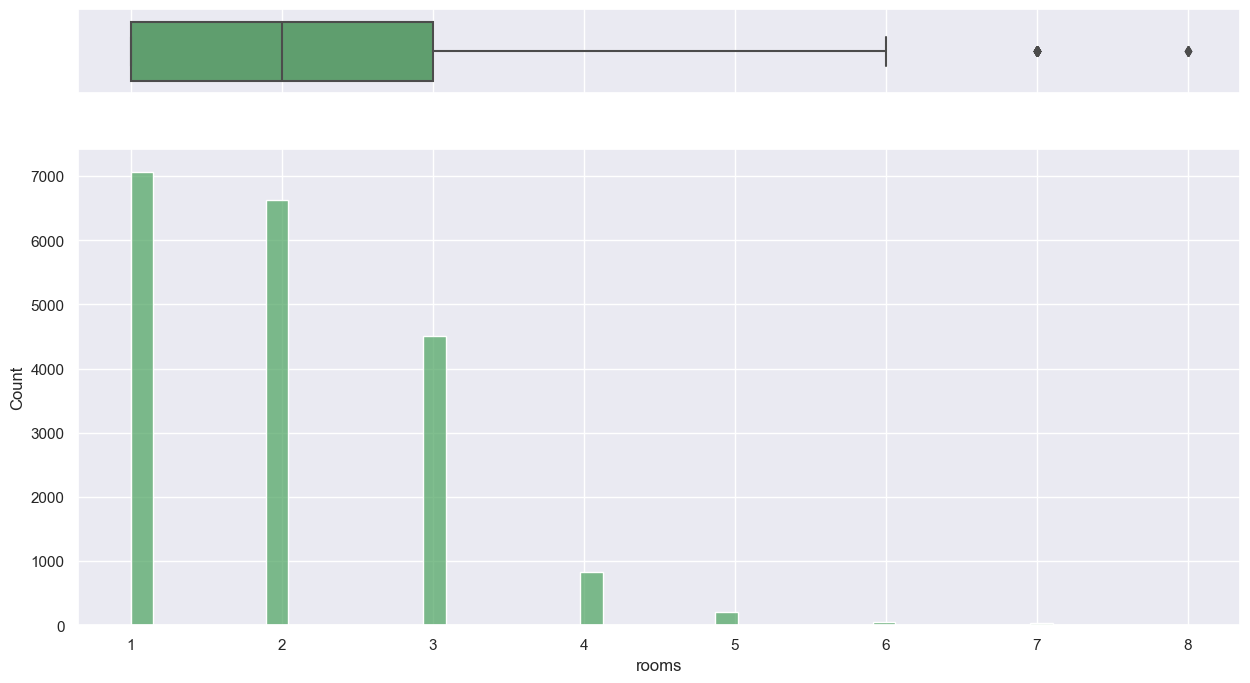

In [155]:
# построим гистограмму и boxplot для столбца rooms

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='rooms', color='g', width=0.7, ax=ax1)
sns.histplot(data=df, x='rooms', color='g', ax=ax2)


ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу rooms:** самые популярная недвижимость - однокомнатная, что подтверждает моё аналогичное предположение в комментарии по столбцу living_area. Недвижимости с меньшим кол-вом комнат больше, и чем больше комнат в недвижимости, тем меньше существует такой недвижимости, либо тем меньше такая недвижимость продаётся.

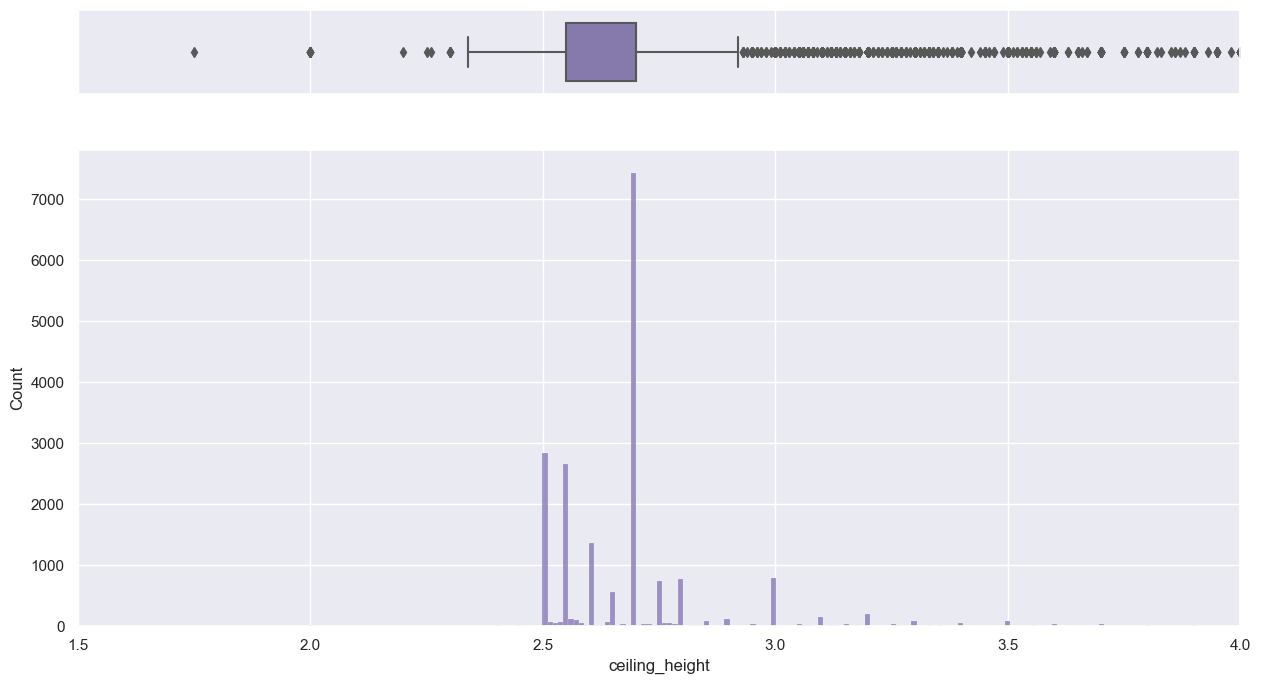

In [156]:
# построим гистограмму и boxplot для столбца ceiling_height

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='ceiling_height', color='m', width=0.7, ax=ax1)
sns.histplot(data=df, x='ceiling_height', color='m', ax=ax2)

plt.xlim(1.5, 4)
ax1.set(xlabel='')
plt.show()

In [157]:
df['ceiling_height'].describe()

count    19316.000000
mean         2.691346
std          0.210063
min          1.750000
25%          2.550000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [158]:
df['ceiling_height'].value_counts().head(10)

2.70    7432
2.50    2809
2.55    2650
2.60    1359
3.00     782
2.80     758
2.75     741
2.65     556
3.20     193
3.10     143
Name: ceiling_height, dtype: int64

**Комментарий по столбцу ceiling_height:** медиана совпадает с третьим квартилем, то бишь высота потолков в 2.7 метра встречается очень часто, что подтверждается также сортировкой кол-ва недвижимости по высоте потолков.

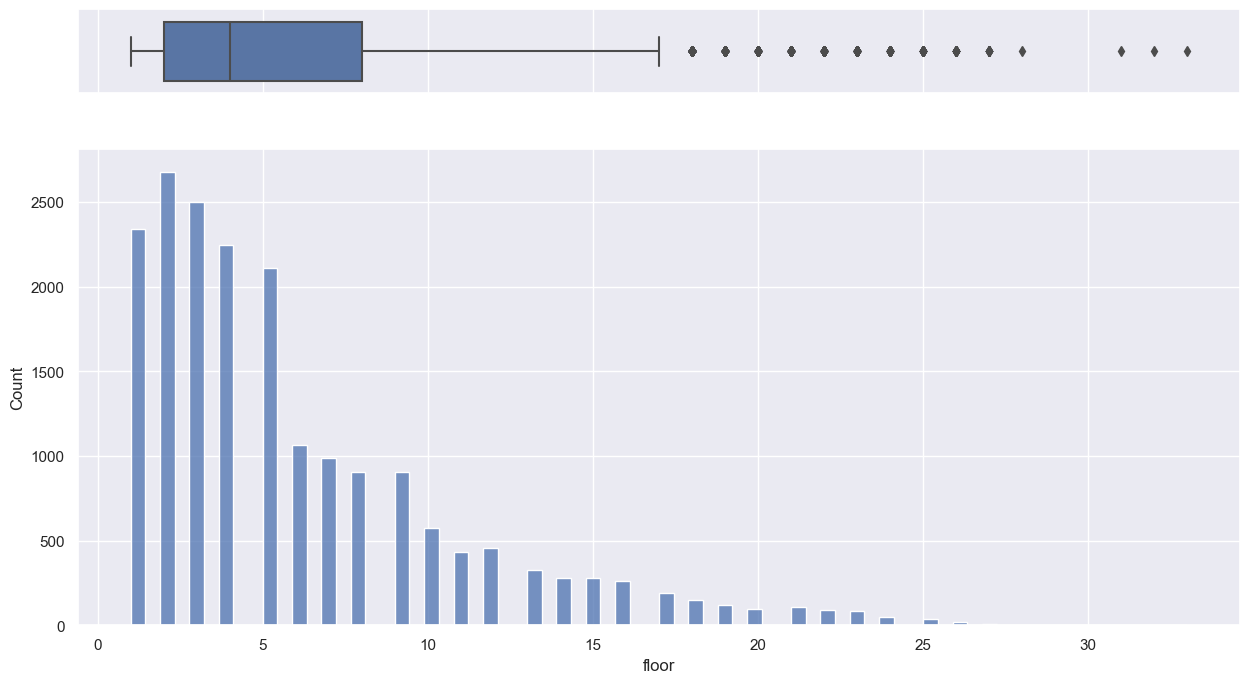

In [159]:
# построим гистограмму и boxplot для столбца floor

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='floor', color='b', width=0.7, ax=ax1)
sns.histplot(data=df, x='floor', color='b', ax=ax2)

ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу floor:** б*о*льшая часть продаваемой недвижимости находится на пятом и ниже этажах. Предположу, что это те самые "хрущёвки", с которыми люди желают расстаться и переехать в более новые ЖК. Распределение похоже на распределение Пуассона - нулевое значение отсутствует, далее резкий пик и медленное снижение, что также отражает реальность - зданий с меньшим кол-вом этаже больше, чем с б*о*льшим.

<AxesSubplot: xlabel='floor_type', ylabel='Count'>

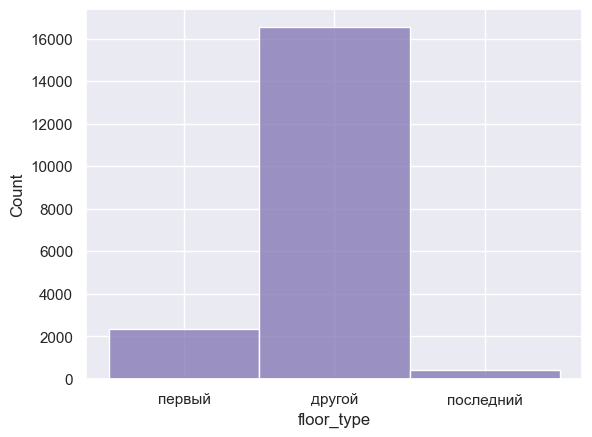

In [160]:
# построим гистограмму для столбца floor_type

sns.histplot(data=df, x='floor_type', color='m')

**Комментарий по столбцу floor_type:** чаще продают недвижимость на первых этажах, чем на последних. Это может быть связано со следующими причинами:
1. На более низких этажах более высокая слышимость, мешающая мещанскому покою.
2. Потенциальным грабителям проще добраться до первого этажа, чем до последнего.

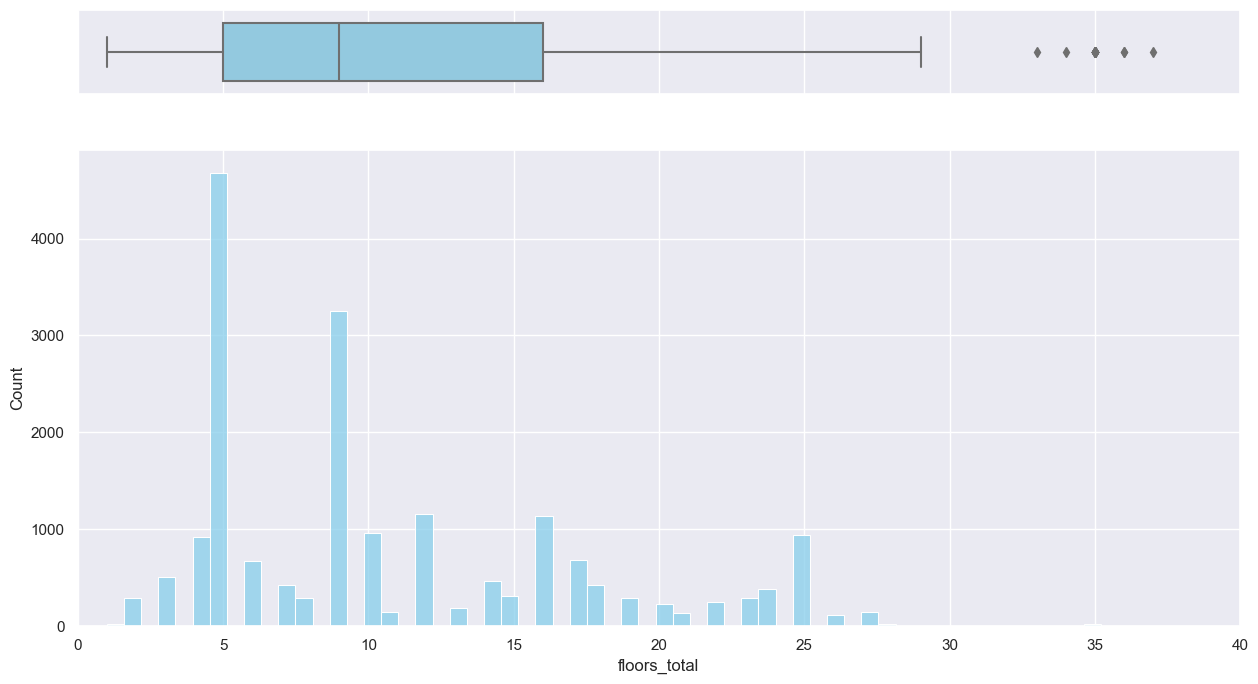

In [161]:
# построим гистограмму и boxplot для столбца floors_total

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='floors_total', color='skyblue', width=0.7, ax=ax1)
sns.histplot(data=df, x='floors_total', color='skyblue', ax=ax2, bins=100)

plt.xlim(0, 40)
ax1.set(xlabel='')
plt.show()

In [162]:
df['floors_total'].value_counts().sort_index()

1       20
2      287
3      508
4      914
5     4682
6      671
7      427
8      291
9     3256
10     957
11     149
12    1153
13     187
14     469
15     308
16    1137
17     679
18     422
19     294
20     228
21     133
22     249
23     288
24     377
25     939
26     109
27     142
28      16
29       1
33       1
34       1
35      16
36       2
37       1
52       1
60       1
Name: floors_total, dtype: int64

**Комментарий по столбцу floors_total:** больше всего пятиэтажек - набившие оскомину моим пальцам "хрущёвки". В целом, вероятно, такое распределение общего кол-ва этажей зависит от популярности определённого вида зданий среди застройщиков, либо объясняется определёнными техническими требованиями. Как видим, одиннадцатиэтажные и тринадцатиэтажные здания значительно менее популярные, чем пяти- и девятиэтажные.

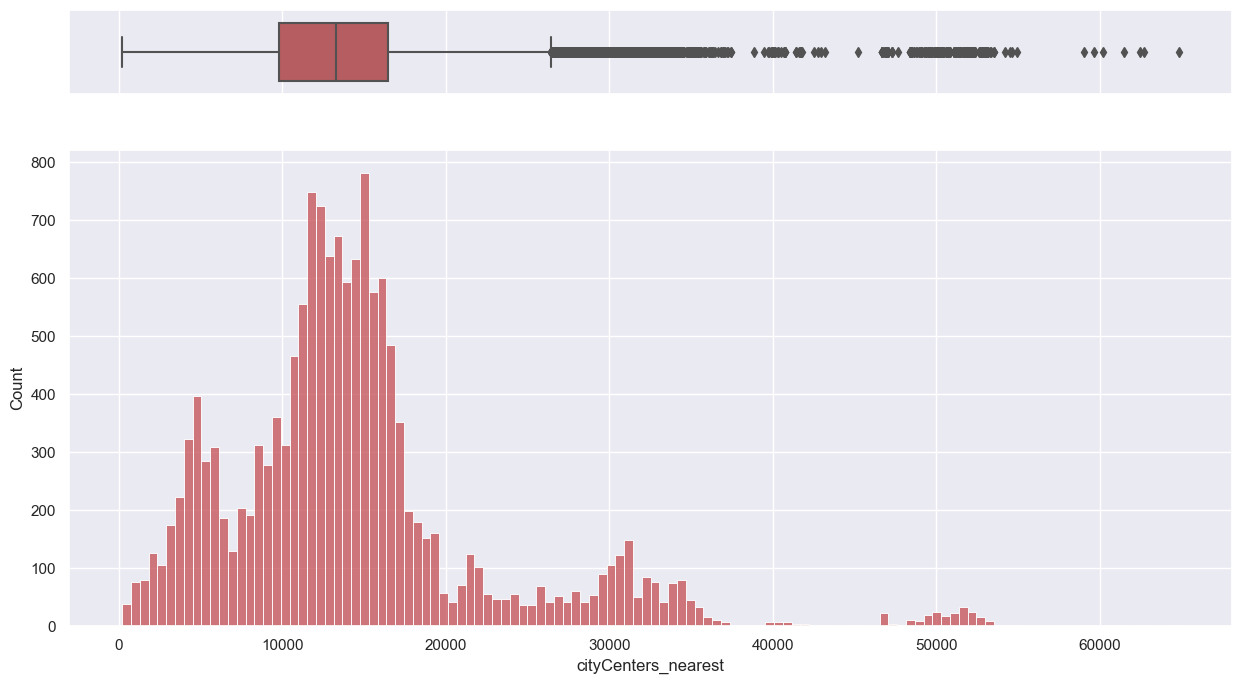

In [163]:
# построим гистограмму и boxplot для столбца cityCenters_nearest

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(15, 8))

sns.boxplot(data=df, x='cityCenters_nearest', color='r', width=0.7, ax=ax1)
sns.histplot(data=df, x='cityCenters_nearest', color='r', ax=ax2)

ax1.set(xlabel='')
plt.show()

In [164]:
df['cityCenters_nearest'].describe()

count    14897.000000
mean     14479.908774
std       8521.427678
min        208.000000
25%       9811.000000
50%      13268.000000
75%      16456.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

**Комментарий по столбцу cityCenters_nearest:** недвижимости для продажи в минимальной близости мало, т.к. в центре постройках таких зданий либо запрещена, либо их в целом мало, либо площадь для застройки совсем небольшая. Чем дальше от центра, тем недвижимости на продажу больше, т.к. строить дальше от центра становится дешевле, жильё доступнее, площади для застроек больше.

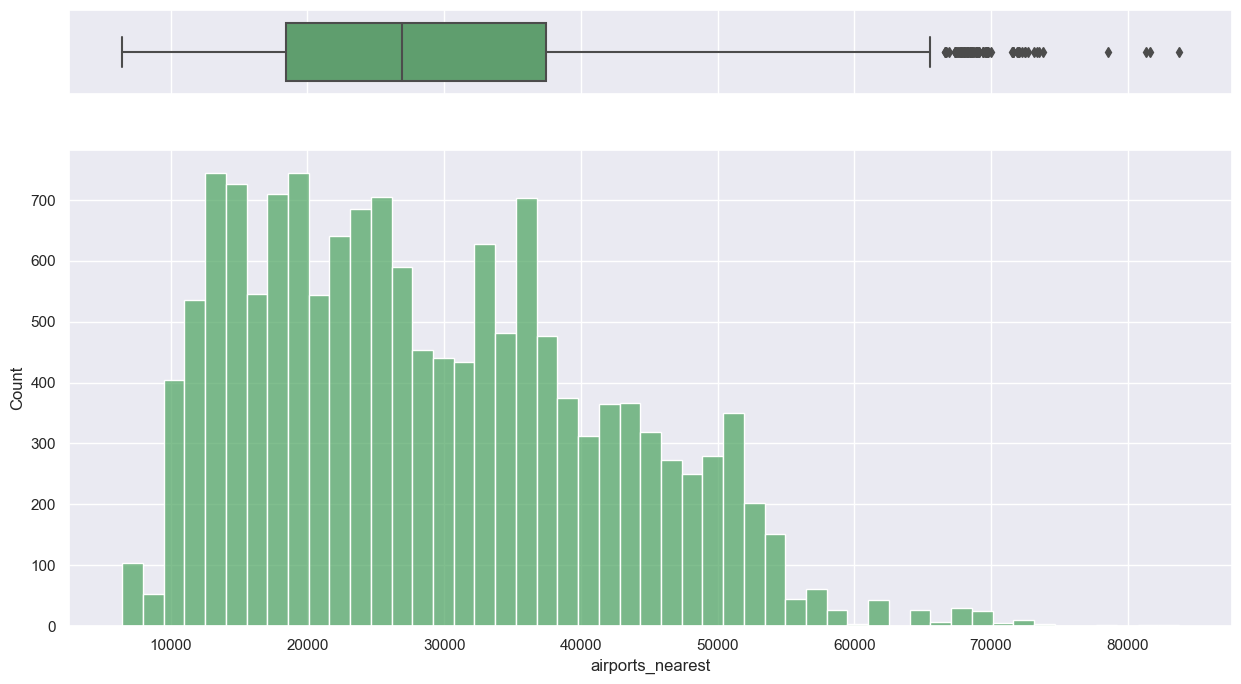

In [165]:
# построим гистограмму и boxplot для столбца airports_nearest

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='airports_nearest', color='g', width=0.7, ax=ax1)
sns.histplot(data=df, x='airports_nearest', color='g', ax=ax2)

ax1.set(xlabel='')
plt.show()

In [166]:
df['airports_nearest'].describe()

count    14877.000000
mean     28926.946562
std      12810.326357
min       6450.000000
25%      18427.000000
50%      26949.000000
75%      37434.000000
max      83758.000000
Name: airports_nearest, dtype: float64

**Комментарий по столбцу airports_nearest:** большинство недвижимости находится примерно на одинаковой отдалённости от аэропорта, и чем дальше от города мы продвигаемся, тем меньше становится продаваемой недвижимости и больше расстояние до ближайшего аэропорта. 

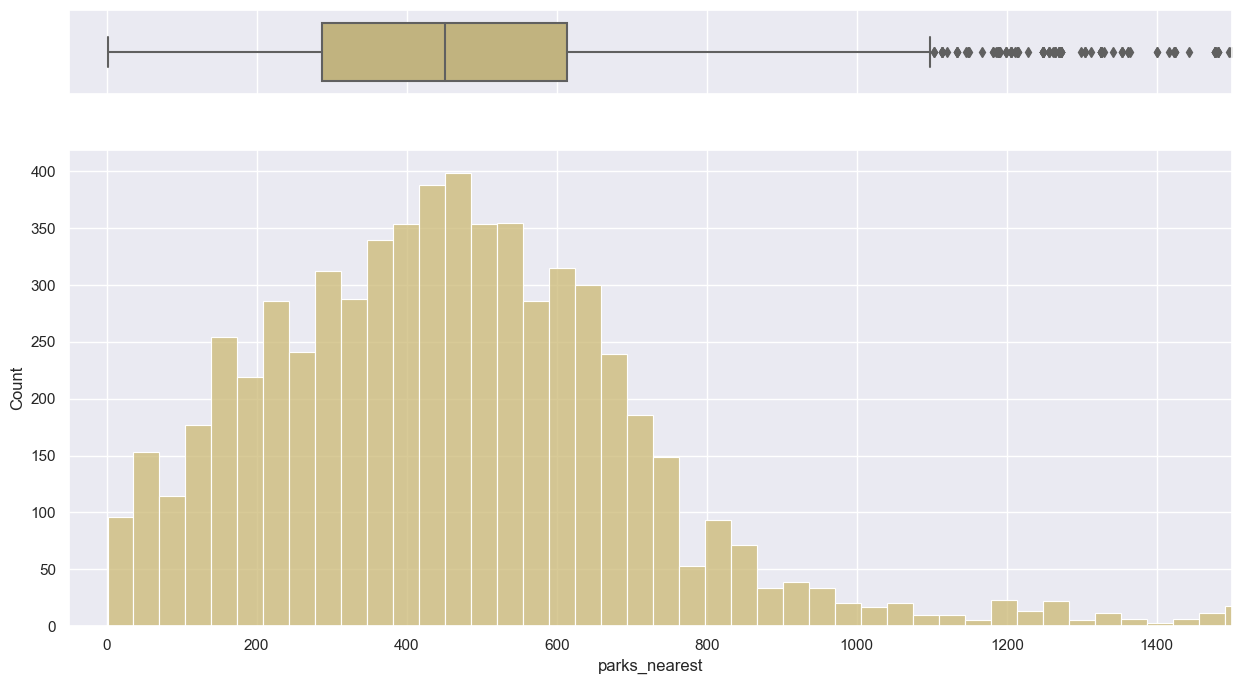

In [167]:
# построим гистограмму и boxplot для столбца parks_nearest

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 8))

sns.boxplot(data=df, x='parks_nearest', color='y', width=0.7, ax=ax1)
sns.histplot(data=df, x='parks_nearest', color='y', ax=ax2)

plt.xlim(-50, 1500)
ax1.set(xlabel='')
plt.show()

In [168]:
df['parks_nearest'].describe()

count    6444.000000
mean      489.170391
std       339.258444
min         1.000000
25%       287.000000
50%       451.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Комментарий по столбцу parks_nearest:** минимальное расстояние до парка - 1 метр. Вероятно, такое возможно, когда на придворовых территориях ЖК находятся небольшие парки, которые делают для своих жителей сами ЖК. Либо парк окружён различными ЖК.

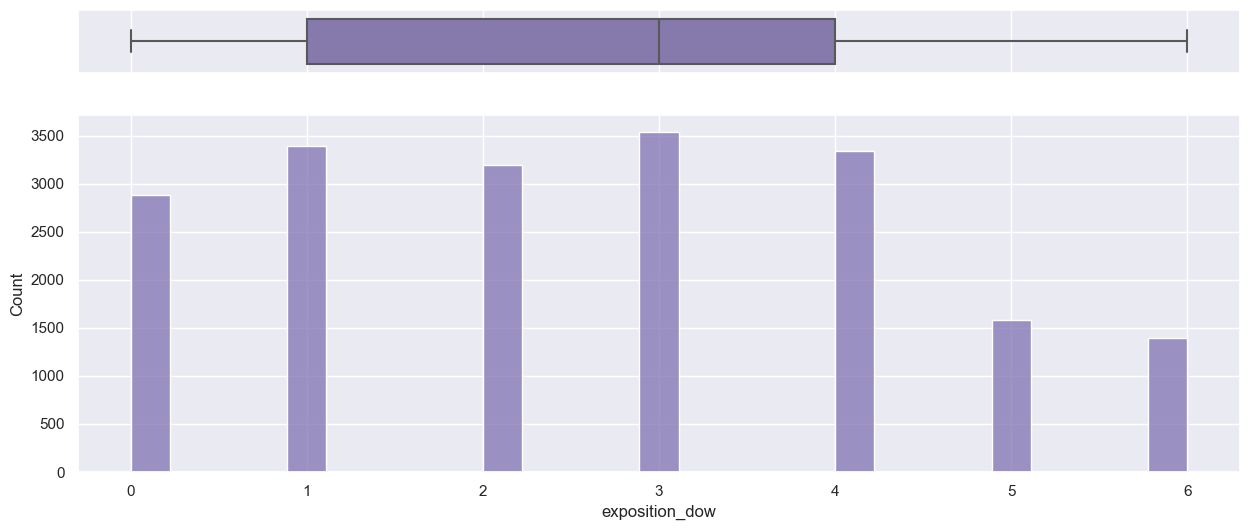

In [169]:
# построим гистограмму и boxplot для столбца exposition_dow

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 6))

sns.boxplot(data=df, x='exposition_dow', color='m', width=0.7, ax=ax1)
sns.histplot(data=df, x='exposition_dow', color='m', ax=ax2)

ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу exposition_dow:** чаще всего недвижимость выставляется на продажу в будни: дни, когда человек, недовольный работой или общим положением дел, решается изменить всё и уехать куда-нибудь, продав при этом своё опостылевшее гнёздышко. Либо именно в будние дни у пользователей есть доступ к рабочему компьютеру, с которого удобнее/привычнее выложить объявление. В любом случае, в выходные дни люди предпочитают отдыхать, а не менять надоевший образ жизни и продавать квартиры.

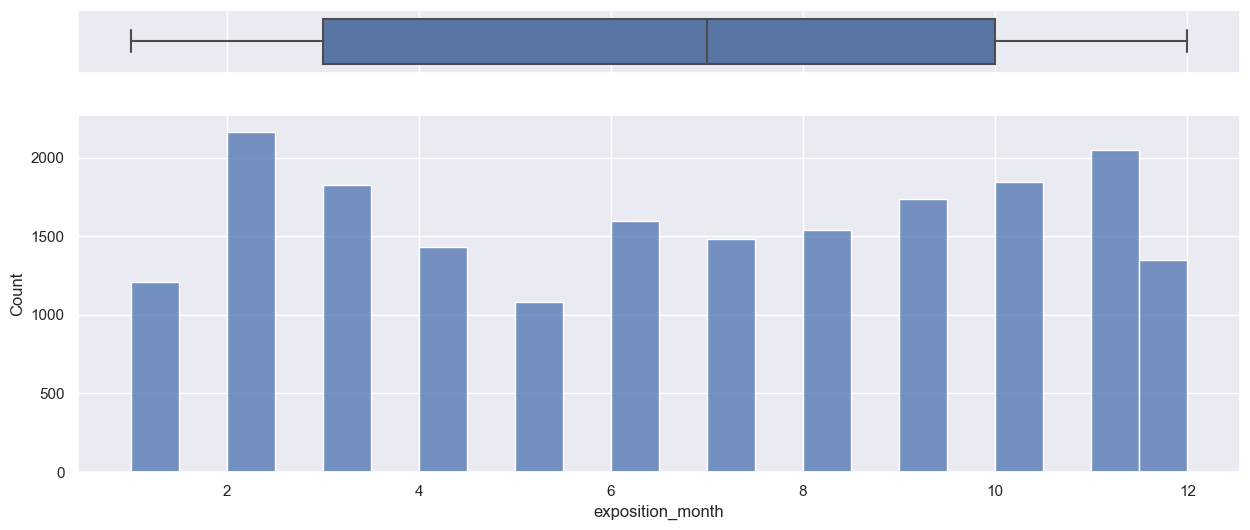

In [170]:
# построим гистограмму и boxplot для столбца exposition_month

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 6))

sns.boxplot(data=df, x='exposition_month', color='b', width=0.7, ax=ax1)
sns.histplot(data=df, x='exposition_month', color='b', ax=ax2)


ax1.set(xlabel='')
plt.show()

**Комментарий по столбцу exposition_month:** реже всего объявления выкладываются в январе и мае: первую половину января пользователь отдыхает, вторую - восстанавливается после отдыха. Восстановившись, пользователи понимают, что возвращаться в серые будни после ярких праздников тяжело, и пора изменить жизнь - продать имущество и уехать куда-нибудь, чем и объясняется повышенная коммерческая деятельность на Яндекс.Недвижимости в феврале. В мае приходит первое тепло и петербуржцев посещает нечто, о чём они знают только понаслышке - звезда по имени Солнце, поэтому продавать квартиры некогда.  

<a id='part3.2'></a>
### 2. Выяснить, как быстро продавались квартиры.

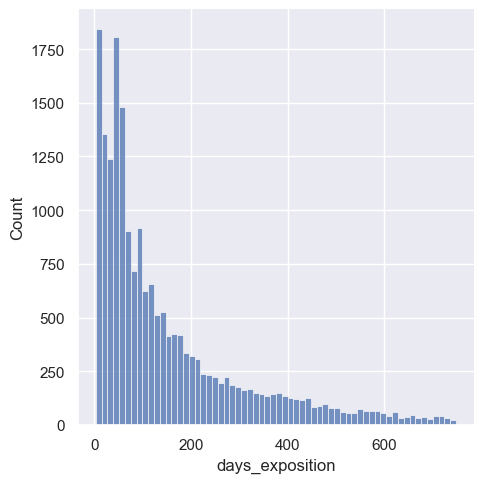

In [171]:
# строим гистограмму
sns.displot(data=df, x='days_exposition')

<AxesSubplot: xlabel='days_exposition'>

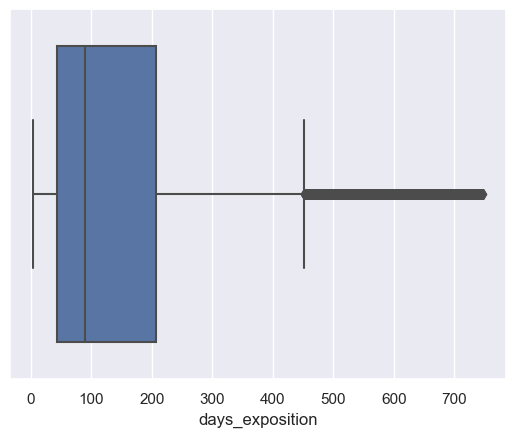

In [172]:
# построим "ящик с усами"
sns.boxplot(data=df, x='days_exposition')

In [173]:
# смотрим на описательные статистики
df['days_exposition'].describe()

count    19316.000000
mean       151.588942
std        157.577656
min          3.000000
25%         44.000000
50%         90.000000
75%        207.000000
max        748.000000
Name: days_exposition, dtype: float64

**Комментарий:**

- Директор по маркетингу компани ПИК-Брокер, Гита Герасимова, заявляет, что время реализации объекта недвижимости зависит от комнатности. Так, однокомнатные квартиры продаются 1-2 месяца, двухкомнатные - 3-4 месяца, трёхкомнатные - до 6 месяцев, следовательно, в среднем около 3 месяцев;
- Согласно исследованию СберДанных за первые 7 месяцев 2019 года, медианное время реализации квартир в Санкт-Петербурге составило 68 дней;

Судя по явному смещению медианы влево в рамках boxplot, большинство значений находятся до 100 дней, конкретнее в области 85-90 дней. Однако, судя по среднему, присутствует некоторое кол-во аномальных значений, которые сильно влияют как на среднее, так и на весь ряд. Субъективно, даже срок реализации равный году кажется мне большим, не говоря о полуторе или двух годах. Вероятно, следует отбросить недвижимость со временем реализации свыше 500 дней. Минимальное время продаж равно трём дням, и, возможно, это выглядит нереалистично, но если подсчитать кол-во объявлений со временем реализации от 3 до 15 дней, то получится не малая доля (около 10%). Будем считать, что время продажи от 3 до 7 дней считаются быстрыми.

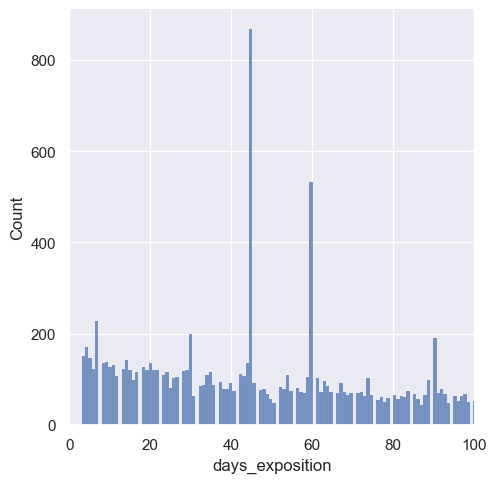

In [174]:
# взглянем ближе на диапазон до 100 дней

sns.displot(data=df, x='days_exposition', bins=900)
plt.xlim(0, 100)
plt.show()

**Комментарий:**

Самые большие пики примерно на 45 и 60 днях. Вряд ли квартиры чудесным способом продавались ровно на 45 или 60 день. Возможно, у сервиса есть условия по размещению бесплатных объявлений, например, 45 дней висят квартиры однокомнатные, 60 дней - двухкомнатные, а 90 дней - трёхкомнатные, а по истечению срока нужно либо заплатить, чтобы объявления продолжали висеть в продаже, либо объявления снимаются. То есть, на графике, вероятно, изображены скорее не то, сколько дней заняла продажа квартиры, а то, сколько дней объявление находилось на сайте. И такие большие пики, потому что, например, однокомнатная квартира висела на сайте все 45 дней, не продалась, владелец не пожелал платно продлевать время размещения объявления, объявление снималось и автоматически вносилось в базу, как недвижимость проданная.

<a id='part3.3'></a>
### 3. Выявление зависимости между ценой и общей, жилой площадью, площадью кухни, количеством комнат, этажём, на котором расположена квартира, датой размещения. Построение графиков, которые покажут зависимость цены от указанных параметров.

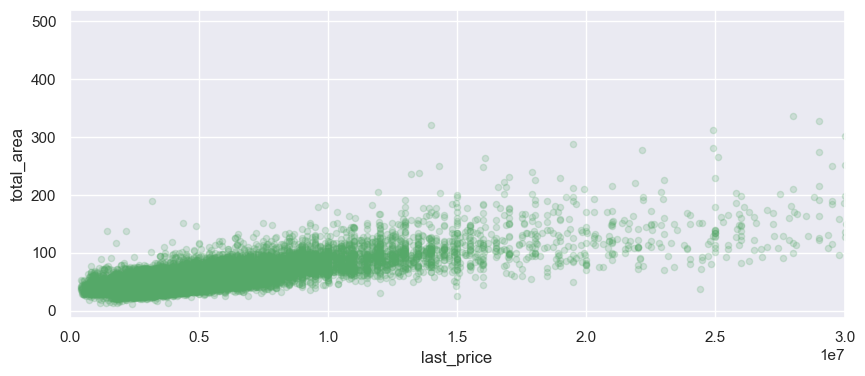

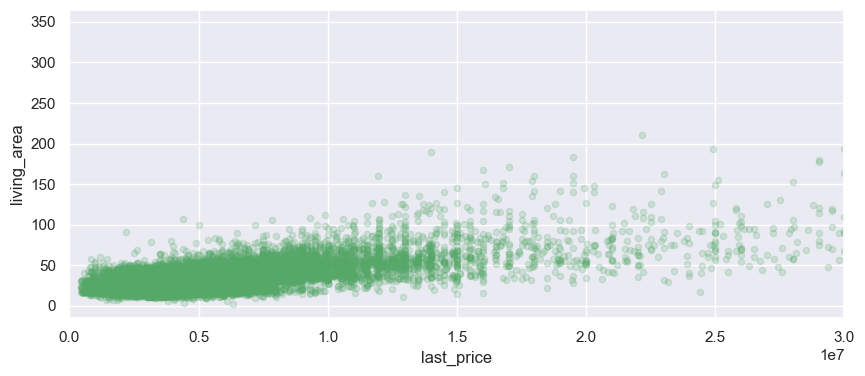

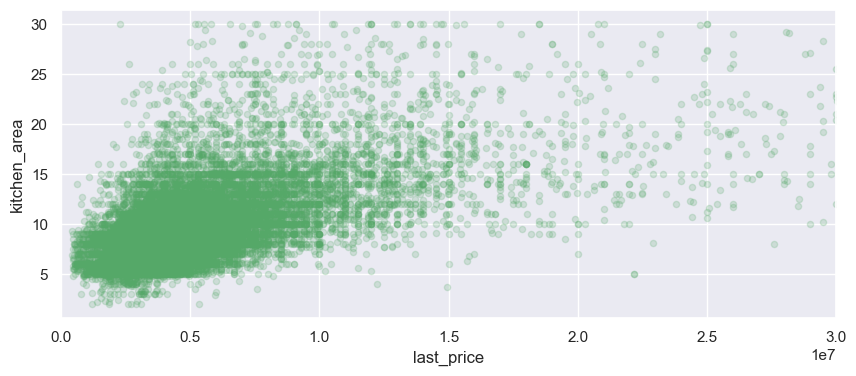

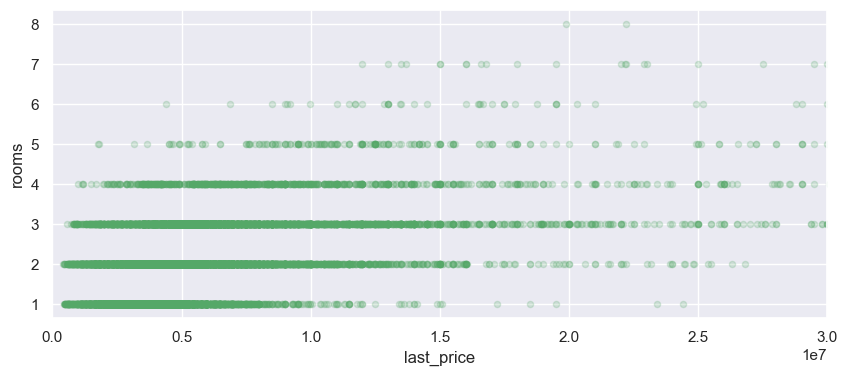

In [175]:
# создадим датафрейм, в который поместим необходимые для задания столбцы
df_for_matrix = pd.DataFrame()
df_for_matrix = df[['last_price', 'total_area', 'living_area', 'kitchen_area', \
                    'rooms', 'floor_type', 'exposition_dow', 'exposition_month', \
                    'exposition_year']]

# создадим список столбцов, по которым будет проходиться цикл для поиска
# взаимосвязи с ценой недвижимости
cols1 = ['total_area', 'living_area', 'kitchen_area', 'rooms']

# для каждой пары last_price-столбец из cols построим диаграмму рассеяния
for col in cols1:
    df_for_matrix.plot(x='last_price', y=col, kind='scatter', grid=True, alpha=0.2, figsize=(10, 4), color='g')
    plt.xlim(0, 30000000)

In [176]:
# найдём коэффициент корреляции Пирсона между last_price и cols
df_for_matrix.loc[:,'last_price':'rooms'].corr().head(1)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.0,0.671989,0.599431,0.440783,0.392757


C:\Users\admin\AppData\Local\Temp\ipykernel_14224\1773175677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_matrix['last_price_in_millions'] = df_for_matrix['last_price'] / 1000000


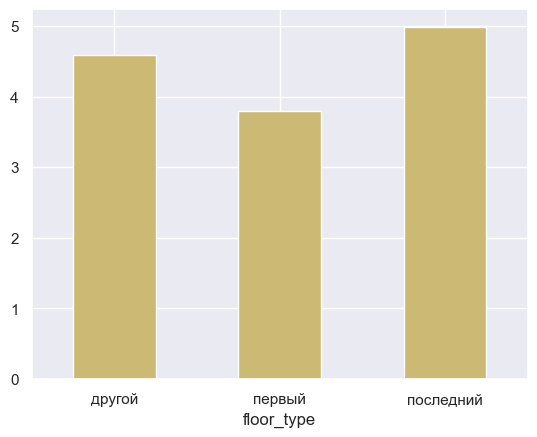

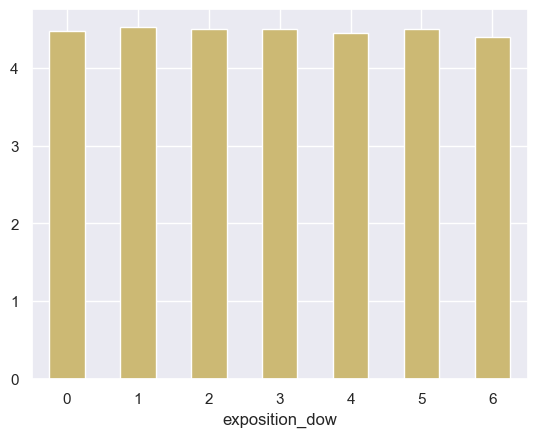

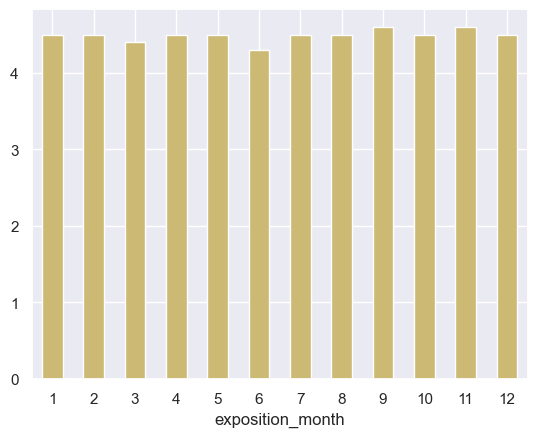

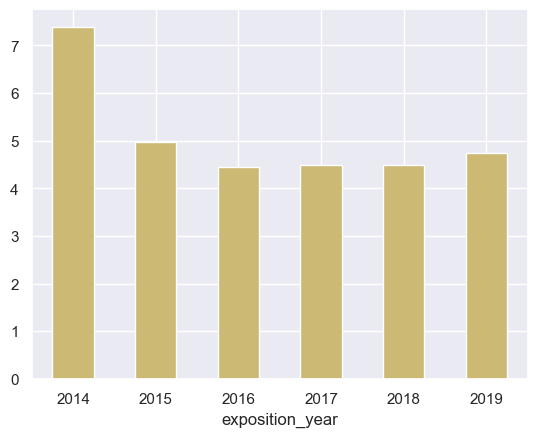

In [177]:
# сгруппируем данные по типу этажа и времени, когда было выложено объявление, 
# найдём медианное значение цены при данной группировке и построим barplots
df_for_matrix['last_price_in_millions'] = df_for_matrix['last_price'] / 1000000
 
cols2 = ['floor_type', 'exposition_dow', 'exposition_month', 'exposition_year']

for col in cols2:
    (df_for_matrix.pivot_table(index=col, values='last_price_in_millions', aggfunc='median')
    .plot.bar(legend=False, rot=0, color='y')
    )

**Вывод:**
1. Между ценой и площадью недвижимости есть не малая зависимость, о чём в том числе свидетельствует корреляция Пирсона, равная 0.67. На диаграмме рассеяния видно, что площадь недвижимости растёт вместе с ценой. Однако уже во втором слева снизу квадрате данные рассеиваются довольно широко: есть недвижимость площадью около 150 кв.м. и стоимостью как до 200 млн.руб., так и 400-500 млн.руб. Далее по мере увеличения площади цена увеличивается, но довольно разбросанно, случайно.
2. Между ценой и жилой площадью также есть зависимость (коэффициент Пирсона равен 0.6). Картина аналогична графику по total_area, однако в данном случае кажется, будто цена растёт чуть медленнее в зависимости от жилой площади.
3. Существует определённая корреляция между ценой и площадью кухни (коэффициент Пирсона равен 0.44). На графике цена логично растёт вместе с площадью кухни, хотя и разрыв между крайными точками довольно большой, и с определённого момента, когда площадь кухни достигает приблизительно 20 кв.м., связь с ценой становится всё меньше (есть как относительно дешёвые варианты для кухонь в 20 кв.м., так и значительно более дорогие).
4. Меньший, хотя и существующий уровень корреляции присутствует между ценой и кол-вом комнат (0.39). Корреляция снизилиась по сравнению с корреляцией цены и общей площадью недвижимости, видимо, по той причине, что комнаты могут быть маленькой площади. Например, 3 комнаты по 15 квадратов и 3 комнаты по 50 квадратов - это всё ещё недвижимость с одинаковым кол-вом комнат, но значительно различающейся ценой, поэтому и корреляция цены и площади недвижимости выше, чем корреляция цены и кол-ва комнат.
5. Взаимосвязь этажа и цены заключается в том, что квартиры на первом этаже стоят дешевле всего, а на последнем - дороже. Можно сделать вывод, что по мере увеличения увеличения этажа квартиры, растёт и цена. Однако в группе "другие" слишком много квартир. Чтобы более точно подтвердить мой вывод, следовало бы добавить больше категорий к квартирам из столбца "другие".
6. Зависимость между днём недели, когда выкладывается объявление, и ценой, практически нет. Разве что, можно заметить, что в воскресенье выкладываются квартиры по чуть более низким ценам.
7. Зависимость между месяцем, когда выкладывается объявление, и ценой также минимальна, в каждый месяц продаются квартиры по приблизительно одинаковым ценам. В июне выкладываются квартиры по чуть более низкой цене.
8. Медианная стоимость квартир в 2014 году была выше, чем за все остальные указанные годы. Вероятно, на это повлияли сторонние факторы: политические изменения, которые привели к миграции определённых слоёв населения и, следовательно, продаже ими недвижимости.

В общем, найденная взаимосвязь логична. Чем больше площадь недвижимости, тем выше цена, а жилая площадь, площадь кухни и кол-во комнат являются частью общей площади недвижимости. Можно также выделить высоту этажа: чем выше этаж, на котором находится квартира, тем выше её стоимость. Зависимость между ценой и днём недели, а также месяцем, когда было выложено объявления, скорее не наблюдается. Зависимость между годом продажи недвижимости и ценой объясняется скорее третьими факторами.

<a id='part3.4'></a>
### 4. Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.

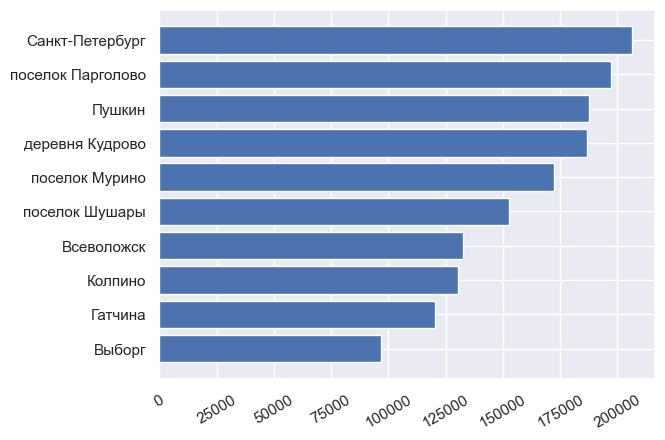

In [178]:
# выделим топ-10 населённых пунктов по кол-ву объявлений

top10_ad_cnt = (df
                .groupby('locality_name')['locality_name']
                .count()
                .sort_values(ascending=False)
                .head(10)
               )

# выделим среднюю стоимость одного кв.м. по данным населённым пунктам

top10_grouped = (df
                   .query('locality_name in @top10_ad_cnt.index')
                   .groupby('locality_name')['m2_price']
                   .agg('mean').round(2)
                   .sort_values()
                )

plt.barh(y=top10_grouped.index, width=top10_grouped.values)
plt.xticks(rotation=30)
plt.show()

**Вывод:** Самый дорогой квадратный метр стоимостью 206 304 руб. находится в Петербурге, а самый дешёвый, 97 005 руб., в Выборге.

<a id='part3.5'></a>
### 5. Расчёт средней стоимости километра до центра Санкт-Петербурга.

<AxesSubplot: xlabel='kms_to_center', ylabel='km_price'>

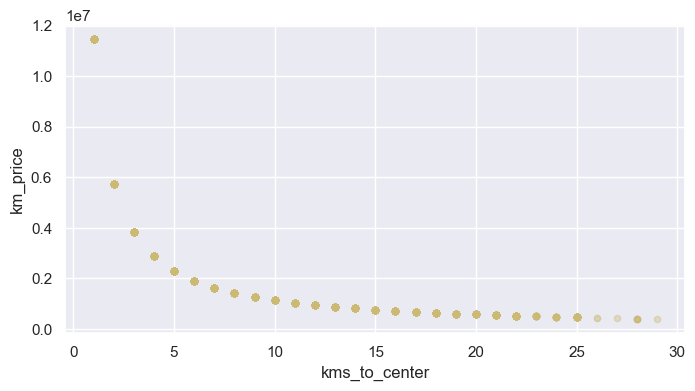

In [179]:
# создадим столбец с ценой за километр только для Санкт-Петербурга

for i in df.query('locality_name == "Санкт-Петербург"')['last_price']:
    df['km_price'] = i / df['kms_to_center']
    
# на основе этого столбца построим диаграмму рассеяния

(df
 .query('locality_name == "Санкт-Петербург"')
 .plot(x='kms_to_center', y='km_price', kind='scatter', grid=True, alpha=0.2, figsize=(8, 4), color='y')
)

**Вывод:** чем дальше недвижимость от центра, тем цена ниже.

<a id='part4'></a>
## Часть 4. Написание общего вывода

*Задача:* установление параметров для определения рыночной стоимости объектов недвижимости. 

Больше всего отражают рыночную стоимость недвижимости следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- кол-во комнат;
- высота этажа недвижимости;
- удалённость от центра города.

Возможные параметры:
- вероятно, для потенциального покупателя важна красота картинки: следует размещать больше фотографий более высокого качества, которые рассказывали бы о положительных сторонах конкретного объекта недвижимости (фотографии из вечернего парка рядом с объектом недвижимости, вид из окон, чистые подъезды и т.п.);
- удалённость от парков, водоёмов, школ, торговых центров, вкратце, близлежащая инфраструктура;
- присутствует ли отделка и какая она (черновая отделка, чистовая отделка, ремонт и мебель/техника продавца);
- возраст дома.

Какая работа была проведена:
- изучена общая информация о данных (поверхностно изучен каждый столбец методом info(), построенны гистограммы и boxplots);
- произведена предобработка данных (найдены и заполнены пропущенные значения, устранены неявные дубликаты в названиях населённых пунктов, изменены типы данных, устранены редкие и выбивающиеся значения);
- добавлены новые столбцы в таблицу (цена одного кв.м., день, месяц и год публикации объявления, тип этажа квартиры, расстояние в км до центра города);
- подробнее изучены большинство параметров таблицы, к ним построены гистограммы и небольшие boxplots, по поводу каждого написаны выводы;
- изучен параметр days_exposition, определена быстрая продажа, долгая, и медианная;
- определена связь между ценой недвижимости и такими параметрами, как общая площадь, жилая площадь, площадь кухни, кол-во комнат, а также время, когда было выложено объявление и тип этажа;
- найдены населённые пункты, где самая высокая (Санкт-Петербург) и низкая (Выборг) цена за квадратный метр;
- определили зависимость между стоимостью объекта и расстоянием до центра города.